In [97]:
import pandas as pd
final_demo_df = pd.read_csv("df_final_demo.txt")


In [176]:
final_demo_df.drop_duplicates()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,age_group
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,"(60, 70]"
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,"(50, 60]"
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,"(30, 40]"
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,"(40, 50]"
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,"(30, 40]"
...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,"(30, 40]"
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,"(30, 40]"
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,"(60, 70]"
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,"(60, 70]"


In [99]:
final_demo_df.dropna(how='any', inplace = True)
final_demo_df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [100]:
final_demo_df['gendr'].value_counts()

gendr
U    24122
M    23724
F    22745
X        3
Name: count, dtype: int64

In [101]:
mean_age = final_demo_df['clnt_age'].mean().round(1)
median_age = final_demo_df['clnt_age'].median()
mode_age = final_demo_df['clnt_age'].mode()[0]
mean_age, median_age, mode_age

(46.4, 47.0, 58.5)

In [102]:
min_age = final_demo_df['clnt_age'].min()
max_age = final_demo_df['clnt_age'].max()
min_age, max_age

(13.5, 96.0)

In [103]:
round(final_demo_df['clnt_age'].std(), 2)

15.59

In [105]:
skewness_age = final_demo_df['clnt_age'].skew().round(1)
kurtosis_age = final_demo_df['clnt_age'].kurtosis().round(1)
skewness_age, kurtosis_age

(0.1, -0.9)

In [170]:
age_group_counts = final_demo_df['age_group'].value_counts().sort_index()
age_group_counts

age_group
(10, 20]     1479
(20, 30]    12545
(30, 40]    12930
(40, 50]    12590
(50, 60]    15549
(60, 70]    11571
(70, 80]     3319
(80, 90]      570
Name: count, dtype: int64

Text(0, 0.5, '')

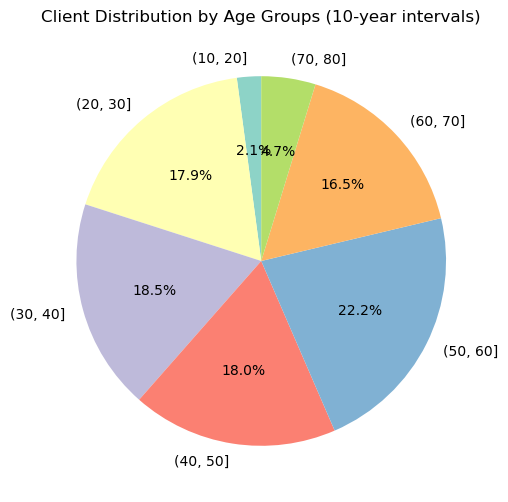

In [174]:
bins = range(10, 90, 10)  

final_demo_df['age_group'] = pd.cut(final_demo_df['clnt_age'], bins=bins)

age_group_counts = final_demo_df['age_group'].value_counts().sort_index()

# Plot pie chart
plt.figure(figsize=(6, 6))
age_group_counts.plot.pie(
    autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3").as_hex()
)

plt.title("Client Distribution by Age Groups (10-year intervals)")
plt.ylabel('')  

In [146]:
age_group = final_demo_df.groupby('clnt_age')
client_count_by_age = final_demo_df.groupby('clnt_age')['clnt_tenure_yr'].count()
client_count_by_age

clnt_age
13.5     1
14.0     2
14.5    23
15.0    22
15.5    37
        ..
93.5     4
94.0     3
94.5     1
95.5     1
96.0     2
Name: clnt_tenure_yr, Length: 165, dtype: int64

In [156]:
client_count_by_age = final_demo_df.groupby('clnt_age')['clnt_tenure_yr'].mean().round(1)
client_count_by_age

clnt_age
13.5     4.0
14.0    13.0
14.5     6.7
15.0     9.3
15.5     8.2
        ... 
93.5    16.8
94.0     8.7
94.5    15.0
95.5    12.0
96.0    15.0
Name: clnt_tenure_yr, Length: 165, dtype: float64

In [162]:
client_count_by_age = final_demo_df.groupby('clnt_age')['clnt_tenure_yr'].max()
age_with_max_tenure = client_count_by_age .idxmax()
age_with_max_tenure

51.0

In [130]:
final_demo_df['clnt_tenure_yr'].mean().round(1)

12.1

In [164]:
final_demo_df['clnt_tenure_yr'].max() # check for mistakes!

62.0

In [106]:
final_experiment_clients_df = pd.read_csv("df_final_experiment_clients.txt")
final_experiment_clients_df

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [107]:
final_experiment_clients_df.dropna(how='any', inplace = True)
final_experiment_clients_df

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
50495,393005,Control
50496,2908510,Control
50497,7230446,Test
50498,5230357,Test


In [108]:
final_experiment_clients_df['Variation'].value_counts()

Variation
Test       26968
Control    23532
Name: count, dtype: int64

In [128]:
my_table = pd.crosstab(index = final_experiment_clients_df['Variation'],  
                              columns="count")     

col_0,count
Variation,
Control,23532
Test,26968


In [109]:
final_web_data_pt_1_df = pd.read_csv("df_final_web_data_pt_1.txt")
final_web_data_pt_1_df

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [110]:
final_web_data_pt_2_df = pd.read_csv("df_final_web_data_pt_2.txt")
final_web_data_pt_2_df

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34
